In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ola.csv')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213


In [3]:
# season
#1.spring
#2.summer
#3.fall
#4.winter

In [4]:
#weather

#1.Clear, Few clouds, Partly cloudy, Partly cloudy
#2.Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3.Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4.Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [5]:
df.shape

(10886, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   weather     10886 non-null  int64  
 3   temp        10886 non-null  float64
 4   humidity    10886 non-null  float64
 5   windspeed   10886 non-null  float64
 6   casual      10886 non-null  int64  
 7   registered  10886 non-null  int64  
 8   count       10886 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 765.6+ KB


In [7]:
df.isnull().sum()

datetime      0
season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.493937,1.120531,1.0,1.0000,2.00,3.0000,4.00
weather,10886.0,2.491916,1.123139,1.0,1.0000,2.00,4.0000,4.00
temp,10886.0,20.137973,8.696625,5.0,12.6300,20.19,27.7075,35.00
humidity,10886.0,59.946072,22.987200,20.0,40.0400,59.97,79.6200,99.98
windspeed,10886.0,24.960981,14.424684,0.0,12.5225,25.00,37.4275,49.99
casual,10886.0,24.517545,14.390014,0.0,12.0000,25.00,37.0000,49.00
registered,10886.0,99.551442,57.541131,0.0,50.0000,100.00,149.0000,199.00
count,10886.0,124.068988,59.449265,0.0,74.0000,124.00,174.0000,248.00


In [9]:
parts = df["datetime"].str.split(" ", n=2, expand=True)
parts

,0,1
0,2011-01-01,00:00:00
1,2011-01-01,01:00:00
2,2011-01-01,02:00:00
3,2011-01-01,03:00:00
4,2011-01-01,04:00:00
...,...,...
10881,2012-03-29,09:00:00
10882,2012-03-29,10:00:00
10883,2012-03-29,11:00:00
10884,2012-03-29,12:00:00


In [10]:
df["date"] = parts[0]
df["time"] = parts[1].str[:2].astype('int')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4


In [11]:
parts = df["date"].str.split("-", n=3, expand=True)
parts

,0,1,2
0,2011,01,01
1,2011,01,01
2,2011,01,01
3,2011,01,01
4,2011,01,01
...,...,...,...
10881,2012,03,29
10882,2012,03,29
10883,2012,03,29
10884,2012,03,29


In [12]:
df["day"] = parts[2].astype('int')
df["month"] = parts[1].astype('int')
df["year"] = parts[0].astype('int')
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,1,1,2011
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,1,1,2011
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,1,1,2011
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,1,1,2011
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,1,1,2011


In [13]:
from datetime import datetime

df['datetime'] = pd.to_datetime(df['datetime'])

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day

def weekend_or_weekday(year, month, day):
    try:
        d = datetime(year, month, day)
        return 0 if d.weekday() > 4 else 1
    except ValueError:
        return np.nan 

df['weekday'] = df.apply(lambda x: weekend_or_weekday(x['year'], x['month'], x['day']), axis=1)

df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,1,1,2011,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,1,1,2011,0
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,1,1,2011,0
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,1,1,2011,0
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,1,1,2011,0


In [14]:
def am_or_pm(x):
    if x > 11:
        return 1
    else:
        return 0


df['am_or_pm'] = df['time'].apply(am_or_pm)
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,1,1,2011,0,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,1,1,2011,0,0
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,1,1,2011,0,0
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,1,1,2011,0,0
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,1,1,2011,0,0


In [15]:
from datetime import date
import holidays


def is_holiday(x):

    india_holidays = holidays.country_holidays('IN')

    if india_holidays.get(x):
        return 1
    else:
        return 0


df['holidays'] = df['date'].apply(is_holiday)
df.head()

,datetime,season,weather,temp,humidity,windspeed,casual,registered,count,date,time,day,month,year,weekday,am_or_pm,holidays
0,2011-01-01 00:00:00,3,2,6.66,76.62,9.57,5,128,133,2011-01-01,0,1,1,2011,0,0,0
1,2011-01-01 01:00:00,4,3,13.54,55.91,4.01,36,184,220,2011-01-01,1,1,1,2011,0,0,0
2,2011-01-01 02:00:00,1,3,29.58,20.97,33.61,34,97,131,2011-01-01,2,1,1,2011,0,0,0
3,2011-01-01 03:00:00,3,1,7.40,61.64,15.85,6,47,53,2011-01-01,3,1,1,2011,0,0,0
4,2011-01-01 04:00:00,3,4,30.66,98.71,11.47,14,199,213,2011-01-01,4,1,1,2011,0,0,0


In [16]:
df.drop(['datetime', 'date'], axis=1, inplace=True)

In [17]:
df.isnull().sum()

season        0
weather       0
temp          0
humidity      0
windspeed     0
casual        0
registered    0
count         0
time          0
day           0
month         0
year          0
weekday       0
am_or_pm      0
holidays      0
dtype: int64

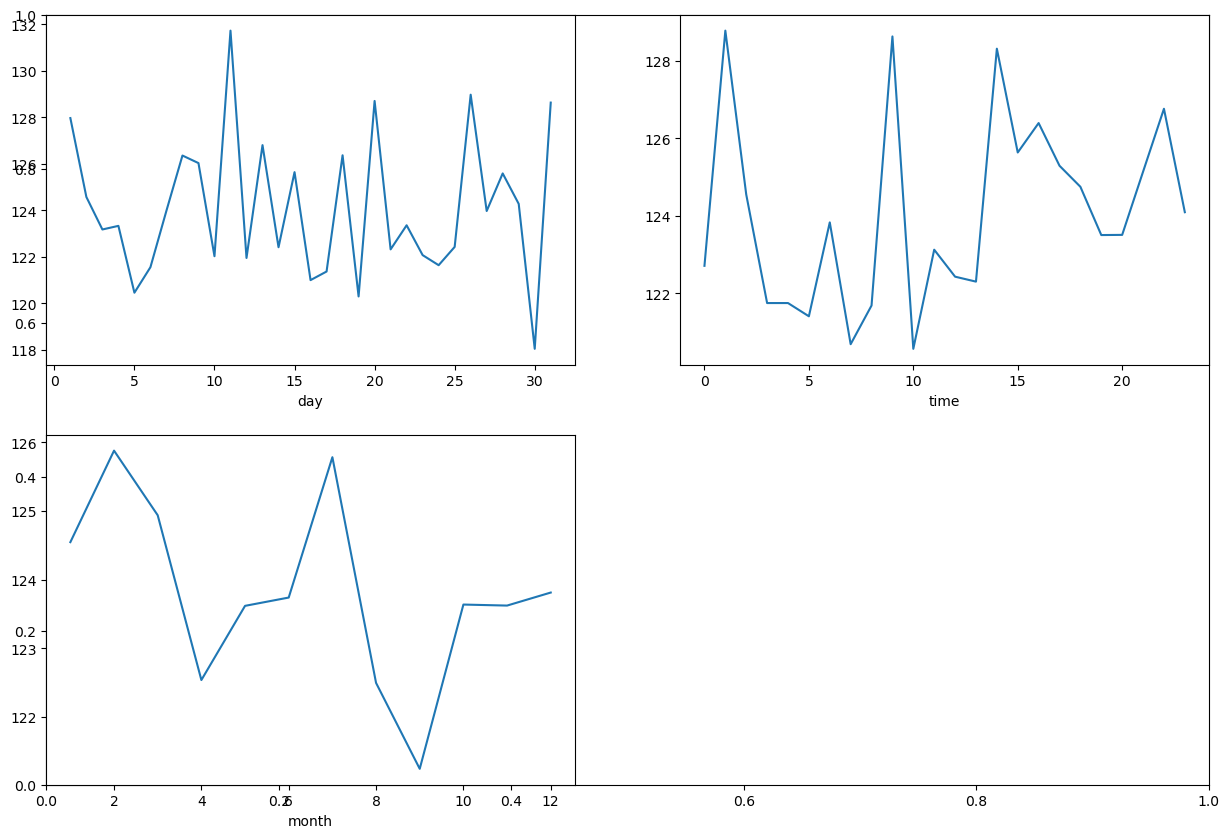

In [18]:
features = ['day', 'time', 'month']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['count'].plot()
plt.show()

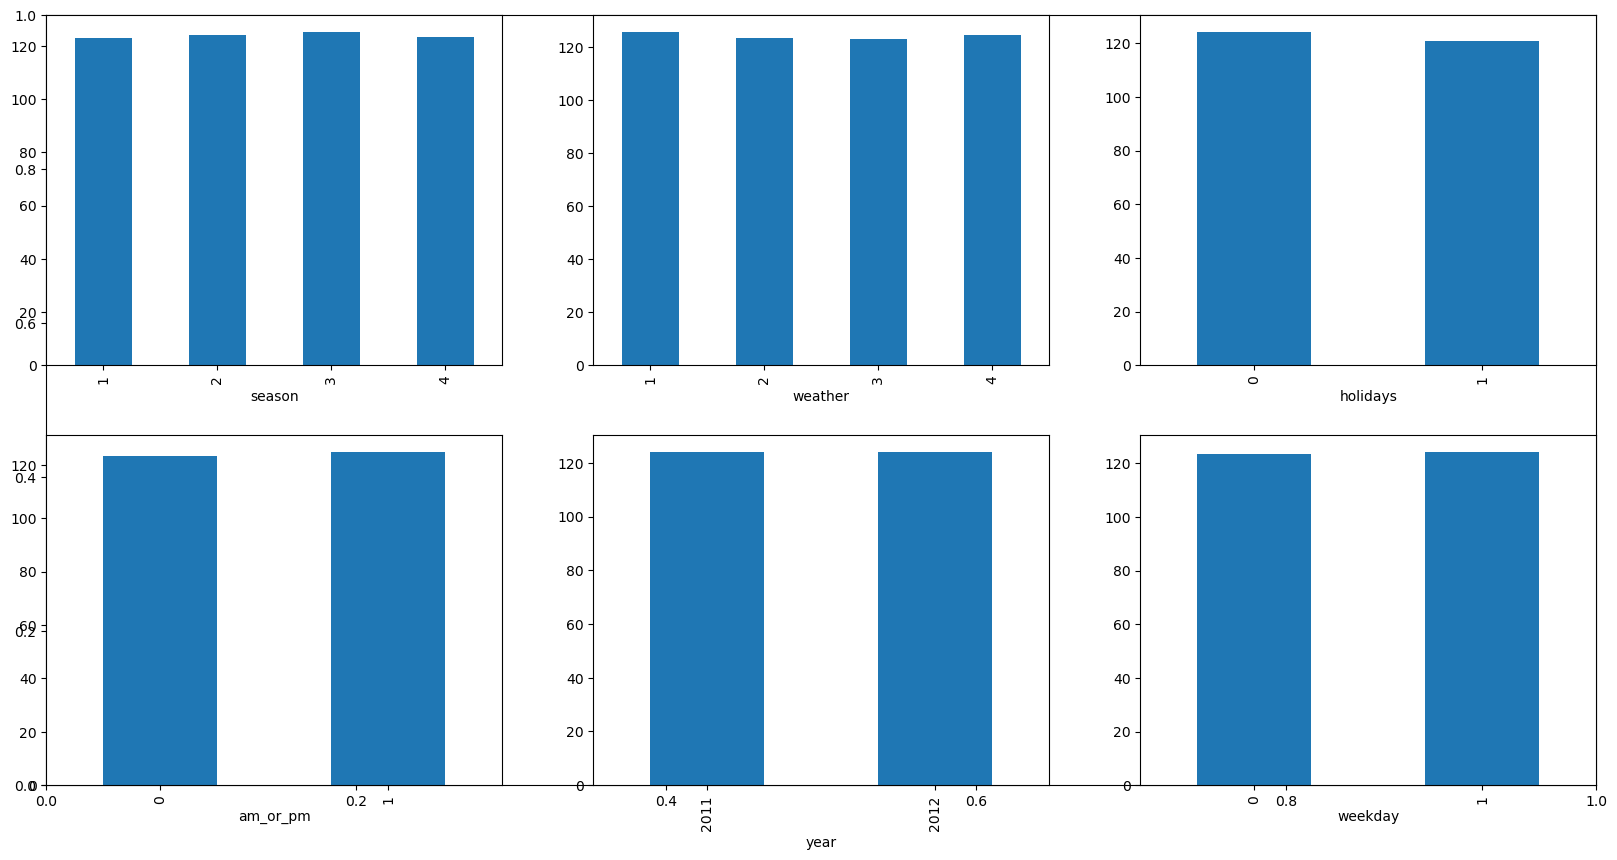

In [19]:
features = ['season', 'weather', 'holidays', 'am_or_pm', 'year', 'weekday']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    df.groupby(col).mean()['count'].plot.bar()
plt.show()

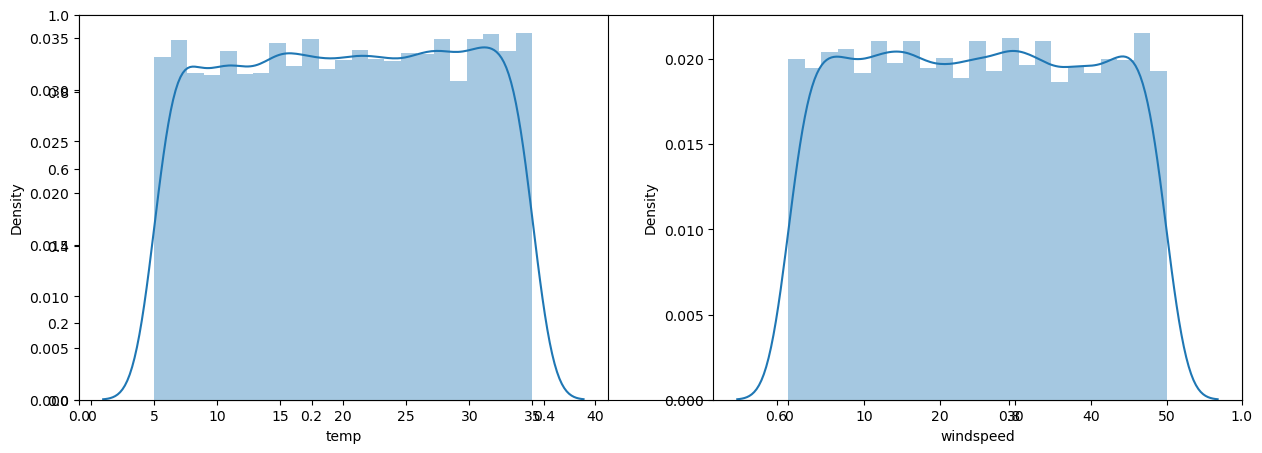

In [20]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.distplot(df[col])
plt.show()

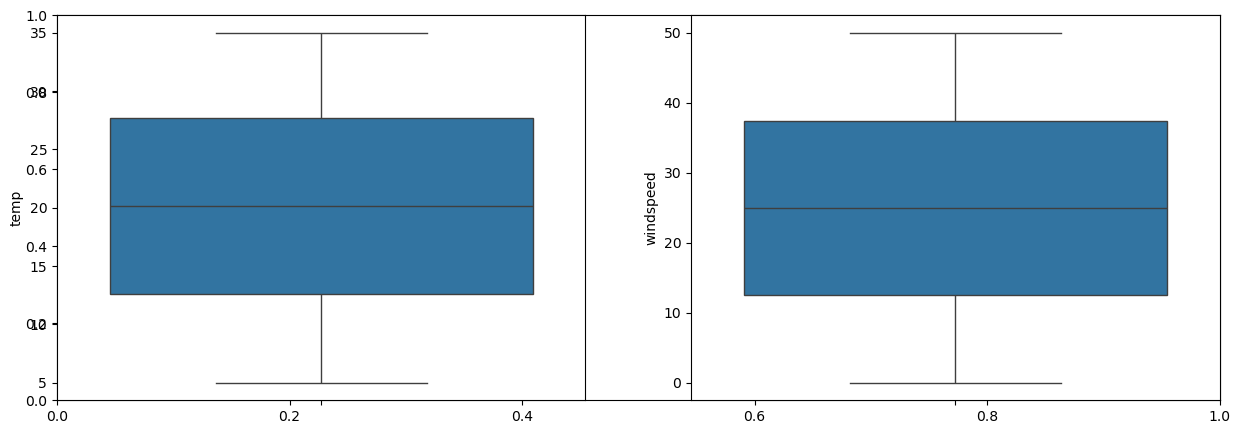

In [21]:
features = ['temp', 'windspeed']

plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
  plt.subplot(1, 2, i + 1)
  sb.boxplot(df[col])
plt.show()

In [22]:
num_rows = df.shape[0] - df[df['windspeed']<50].shape[0]
print(f'Number of rows that will be lost if we remove outliers is equal to {num_rows}.')

Number of rows that will be lost if we remove outliers is equal to 0.


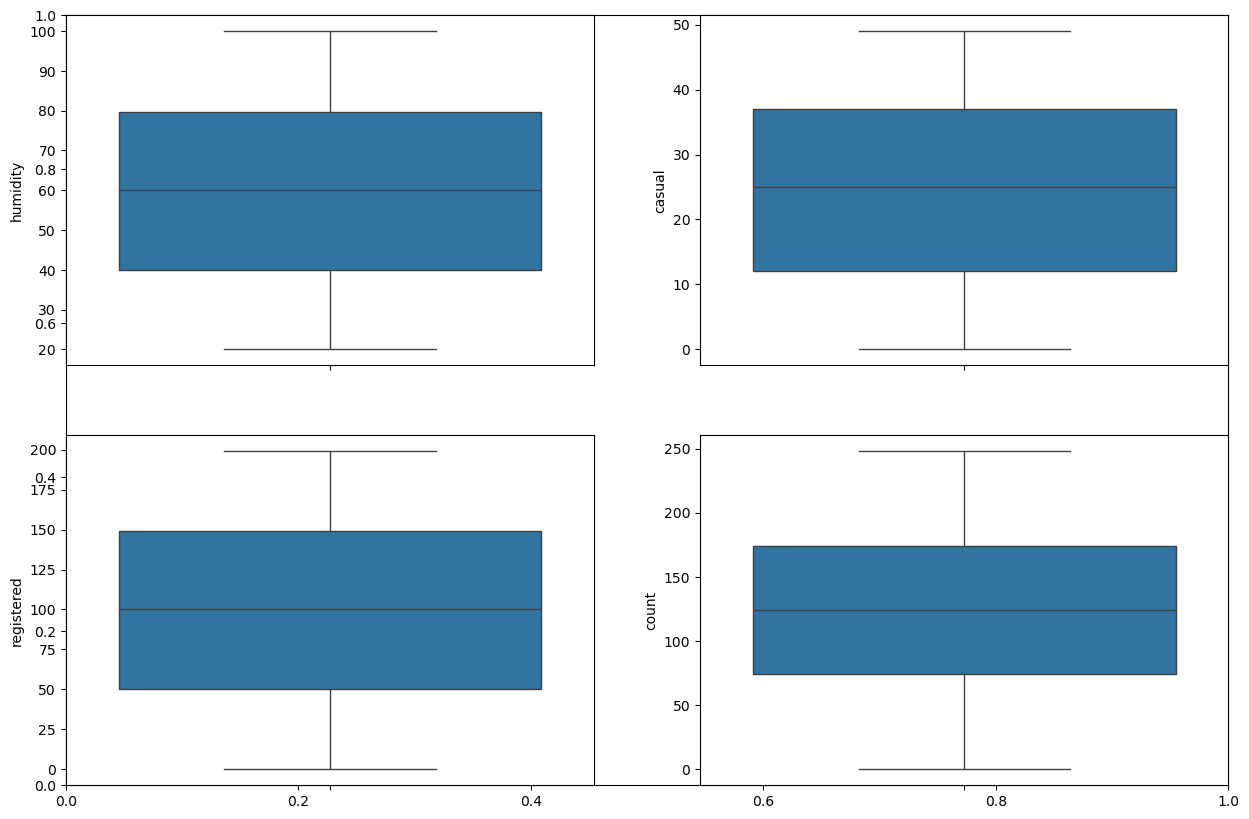

In [23]:
features = ['humidity', 'casual', 'registered', 'count']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sb.boxplot(df[col])
plt.show()

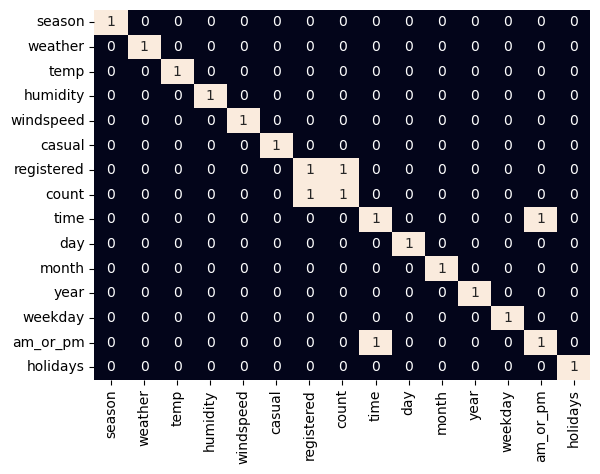

In [24]:
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()

In [25]:
df.drop(['registered', 'time'], axis=1, inplace=True)

In [26]:
df.shape

(10886, 13)

In [27]:
features = df.drop(['count'], axis=1)
target = df['count'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.1, random_state=22)
X_train.shape, X_val.shape

((9797, 12), (1089, 12))

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [29]:
import xgboost
from sklearn.svm import SVR

In [30]:
xgbr = xgboost.XGBRegressor()

In [31]:
models = [LinearRegression(), Lasso(), SVR(), RandomForestRegressor(), Ridge(),xgbr]

for i in range(len(models)):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} :')

    train_preds = models[i].predict(X_train)
    print('Training Error : ', mae(Y_train, train_preds))

    val_preds = models[i].predict(X_val)
    print('Validation Error : ', mae(Y_val, val_preds))
    print()

LinearRegression() :
Training Error :  49.558214498489484
Validation Error :  50.781671627521625

Lasso() :
Training Error :  49.572060191154016
Validation Error :  50.78787280863125

SVR() :
Training Error :  49.374492249175404
Validation Error :  50.973908422492634

RandomForestRegressor() :
Training Error :  18.691200367459427
Validation Error :  51.55517906336088

Ridge() :
Training Error :  49.558207893676055
Validation Error :  50.78167657416355

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,